In [1]:
using Plots,LinearAlgebra

In [2]:
A = [4 0.5 1; 2 0.5 1;4 1 -0.9]
b = [1; 1 ;1]

3-element Vector{Int64}:
 1
 1
 1

In [3]:
print(pinv(A)*b)

[1.1102230246251565e-16, 1.3103448275862069, 0.3448275862068965]

In [4]:
print(opnorm(A))

6.126061778334167

In [5]:
max_iter = 200000
ep = 10^(-12)

1.0000000000000002e-12

In [6]:
function richardson(A,b,damping=1)
    x_0=[0; 0; 0]
    for i = 1:max_iter
        #println(x_0)
        if norm(A*x_0-b)<ep
            return x_0,norm(A*x_0-b)
        end
        x_0 = x_0+damping*(b-A*x_0)
    end
    return x_0,norm(A*x_0-b)
end

richardson (generic function with 2 methods)

In [7]:
x_richard,error_richard = richardson(A,b,0.00005)
println(x_richard)
println(error_richard)

[-451348.2462941908, -954880.9950349263, 3.091976457697629e6]
5.857520552024731e6


In [8]:
function Jacobi(A,b,damping=1)
    x_0=[0; 0; 0]
    D = Diagonal(diag(A))
    error = []
    for i = 1:max_iter
        #println(x_0)
        if norm(A*x_0-b)<ep
            return x_0,error,i
        end
        x_0 = x_0+damping*inv(D)*(b-A*x_0)
        push!(error,norm(A*x_0-b))
    end
    return x_0,norm(A*x_0-b),max_iter
end

Jacobi (generic function with 2 methods)

[-1.0325074129013956e-14, 1.3103448275860168, 0.34482758620638865] 555


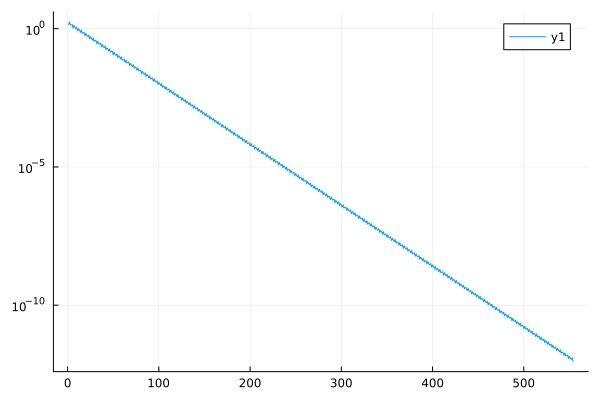

In [15]:
x_jacobi,error_jacobi,iter=Jacobi(A,b,0.5)
println(x_jacobi,' ',iter)
plot(error_jacobi,yaxis=:log)

In [10]:
function Gauss_Seidel(A,b,damping=1)
    x_0=[0; 0; 0]
    D = LowerTriangular(A)
    B=inv(D)
    error = []
    for i = 1:max_iter
        #println(x_0)
        if norm(A*x_0-b)<ep
            return x_0,error,i
        end
        x_0 = x_0+damping*B*(b-A*x_0)
        push!(error,norm(A*x_0-b))
    end
    return x_0,error,max_iter
end

Gauss_Seidel (generic function with 2 methods)

[5.84355820196619e-14, 1.310344827586368, 0.3448275862073352] 398


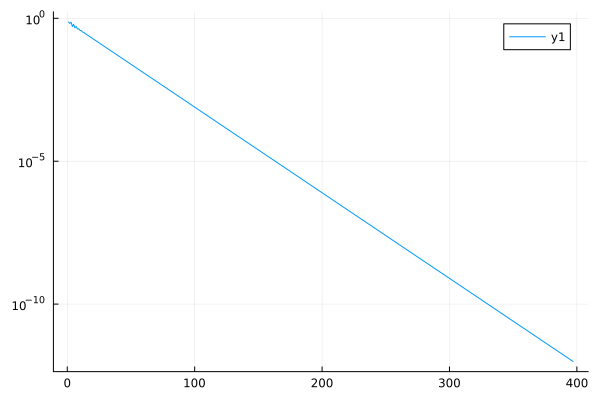

In [16]:
x_gauss,error_gauss,iter=Gauss_Seidel(A,b,0.6)
println(x_gauss,' ',iter)
plot(error_gauss,yaxis=:log)

In [20]:
print(LowerTriangular(A))

[4.0 0.0 0.0; 2.0 0.5 0.0; 4.0 1.0 -0.9]